# Regresión lineal

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

%matplotlib inline

## Oxygen and Hydrocarbon Levels

In [2]:
df = pd.read_excel('table 11-1.xlsx')
df.head()

,Observation,Hydrocarbon,Purity
0,1,0.99,90.01
1,2,1.02,89.05
2,3,1.15,91.43
3,4,1.29,93.74
4,5,1.46,96.73


In [3]:
df.describe()

,Observation,Hydrocarbon,Purity
count,20.00000,20.000000,20.000000
mean,10.50000,1.196000,92.160500
std,5.91608,0.189303,3.020778
min,1.00000,0.870000,87.330000
25%,5.75000,1.017500,89.970000
50%,10.50000,1.195000,92.145000
75%,15.25000,1.330000,93.672500
max,20.00000,1.550000,99.420000


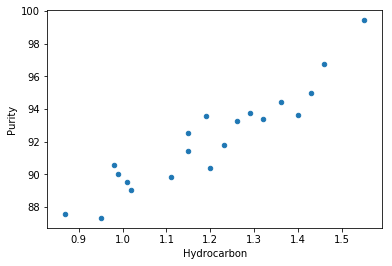

In [4]:
df.plot.scatter('Hydrocarbon', 'Purity')

In [5]:
modelo = smf.ols('Purity ~ Hydrocarbon', data=df)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Purity   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     128.9
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           1.23e-09
Time:                        13:01:58   Log-Likelihood:                -28.985
No. Observations:                  20   AIC:                             61.97
Df Residuals:                      18   BIC:                             63.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      74.2833      1.593     46.617      0.000      70.936      77.631
Hydrocarbon    14.9475      1.317     11.352      0.000      12.181      17.714
==============================================================================
Omnibus:                        0.532   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.766   Jarque-Bera (JB):                0.604
Skew:                           0.157   Prob(JB):                        0.739
Kurtosis:                       2.208   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La ecuación de la recta ajustada es:
$$y=74.2833+14.9475x+\epsilon$$

Desviación estándar de los residuos:

In [6]:
resultado.mse_resid

1.1805453819566858

$$\hat{\sigma}^2=1.1805$$

In [7]:
st.pearsonr(df['Hydrocarbon'].values, df['Purity'].values)

(0.93671538109051822, 1.2273143444594313e-09)

### Respuesta media y predicción

In [8]:
x_val = np.linspace(df['Hydrocarbon'].min(), df['Hydrocarbon'].max(), 100)
pr = resultado.get_prediction({'Hydrocarbon': x_val})

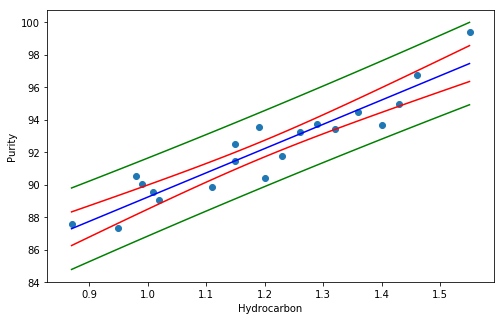

In [9]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.scatter(df['Hydrocarbon'].values, df['Purity'].values)
ax.plot(x_val,pr.conf_int(obs=True), color='green')
ax.plot(x_val,pr.conf_int(), color='red')
ax.plot(x_val,pr.predicted_mean, color='blue')
ax.set_xlabel('Hydrocarbon')
ax.set_ylabel('Purity')

### Residuos
Residuo: $$y_i-\hat{y}_i$$

In [10]:
resultado.resid

0     0.928681
1    -0.479744
2    -0.042916
3     0.174437
4     0.623365
5    -0.161887
6     0.302378
7    -0.898714
8     1.968092
9    -1.559786
10    1.469185
11    1.047084
12    1.628156
13    0.159731
14   -1.025017
15   -1.830290
16    0.132861
17   -0.603987
18   -0.678210
19   -1.153420
dtype: float64

Residuo estandar: $$\frac{y_i-\hat{y}_i}{\sigma}$$

In [11]:
resultado.resid_pearson

array([ 0.8547225 , -0.44153773, -0.03949819,  0.16054509,  0.57372175,
       -0.14899434,  0.27829757, -0.82714246,  1.81135716, -1.43556756,
        1.35218186,  0.96369634,  1.49849249,  0.14701055, -0.94338641,
       -1.6845292 ,  0.12228048, -0.5558871 , -0.62419892, -1.06156387])

### Gráficas de residuos

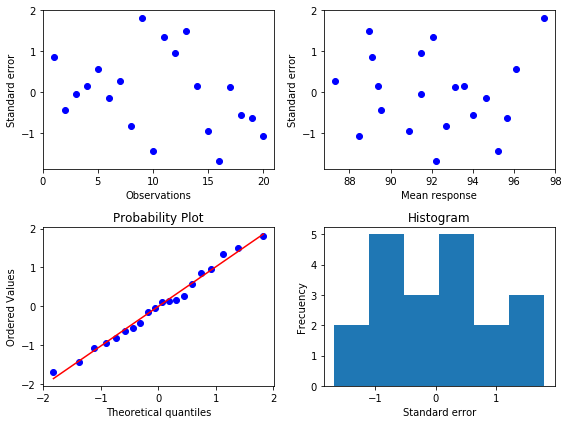

In [12]:
# figura que tendrá los gráficos
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(221)
ax.scatter(df['Observation'], resultado.resid_pearson, color='blue')
ax.set_xlabel('Observations')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(resultado.fittedvalues, resultado.resid_pearson, color='blue')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(223)
st.probplot(resultado.resid_pearson, plot=ax)

ax = fig.add_subplot(224)
ax.hist(resultado.resid_pearson, bins=6)
ax.set_xlabel('Standard error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()